# Régression linéaire simple :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
dataset = pd.read_csv('reg_simple.csv')
dataset.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = regressor.predict(X_test)

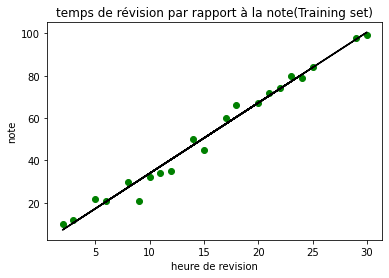

In [7]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('temps de révision par rapport à la note(Training set)')
plt.xlabel('heure de revision')
plt.ylabel('note')
plt.show()

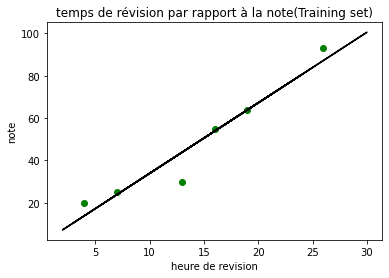

In [8]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('temps de révision par rapport à la note(Training set)')
plt.xlabel('heure de revision')
plt.ylabel('note')
plt.show()

In [9]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(mse)
print(mae)

44.37111207555747
4.705161854768154


# Régression Linéaire Multiple

In [10]:
dataset = pd.read_csv('boston_house_prices.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
#ici on va recuperer plusieurs y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,0:14].values

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

X[:, 3] = labelencoder.fit_transform(X[:, 3])
print(X[:, 3])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

tout ici est en texte brut car les visualisations 3D font planter le reste

In [17]:
mse2 = mean_squared_error(y_test, y_pred_test)
print(mse2)

2.3892128569768913


# Régression Polynomiale

In [18]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [19]:
dataset.shape

(10, 3)

In [20]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

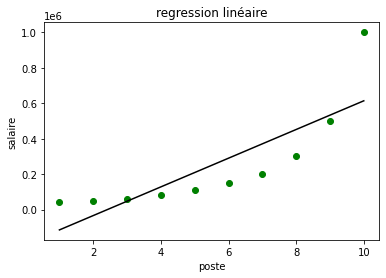

In [22]:
plt.scatter(X, y, color = 'green')
plt.plot(X, lin_reg.predict(X), color = 'black')
plt.title('regression linéaire')
plt.xlabel('poste')
plt.ylabel('salaire')
plt.show()

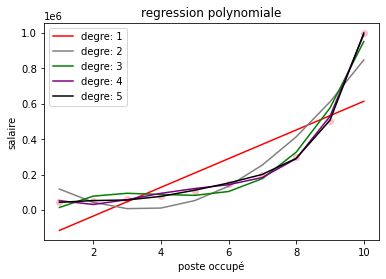

In [23]:
from sklearn.preprocessing import PolynomialFeatures

colors=['red','grey','green','purple','black'] #les couleurs des différentes courbes
plt.scatter(X, y, color = 'pink')

plt.title('regression polynomiale')
plt.xlabel('poste occupé')
plt.ylabel('salaire')
for i in range(1,6):#boucle pour recommencer l'entrainement 5 fois (range1,6)

    poly_reg = PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(X)
    poly_reg.fit(X_poly, y)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)
    
    plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = colors[i-1],label='degre: %s' %i)
    
plt.legend()    
plt.show()

In [24]:
valeur=np.array([6]).reshape(-1, 1)

print('prediction avec la regression polynomiale')
print(lin_reg_2.predict(poly_reg.fit_transform(valeur)))

prediction avec la regression polynomiale
[152736.59673623]


In [25]:
valeur=np.array([6]).reshape(-1, 1)

print('prediction avec la regression linéaire simple')
print(lin_reg.predict(valeur))

prediction avec la regression linéaire simple
[289939.39393939]
